In [109]:
import pandas as pd
import gensim.downloader as api
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

import sys
sys.path.append('../../src/') 
from features.build_features import get_vectors

In [69]:
# Loads word2vec google model
wv = api.load('word2vec-google-news-300')

In [110]:
# Specify wanted time range
start_date = '2019-01-01'
end_date = '2019-02-01'

# Where data files will be stored
path_to_data_files = '../../data/interim/'

# Load DW data
clean_data_file = path_to_data_files + '/clean_keywords_' + start_date + '_' + end_date + '.json'
df_dw = pd.read_json(clean_data_file, orient ='split', compression = 'infer')

# Remove rows witn no category
df_dw.dropna(subset=['keywordStringsCleanAfterFuzz', 'cleanFocusParentCategory'], inplace = True)
df_dw.reset_index(drop = True, inplace = True)

In [111]:
# Split in test and train
lst_keywords_train, lst_keywords_test, label_train, label_test, indices_train, indices_test = \
    train_test_split(df_dw['keywordStringsCleanAfterFuzz'], df_dw['cleanFocusParentCategory'], df_dw.index, test_size=0.33, random_state=0) 

# Vectorise to input to the model
vec_keywords_dw_train = get_vectors(lst_keywords_train.astype(str), wv)
vec_keywords_dw_test = get_vectors(lst_keywords_test.astype(str), wv)

# Create empty dictionaries to store each model's score
score = {}

In [78]:
# Dummy model (mean)
model = DummyClassifier(strategy='uniform')
model.fit(vec_keywords_dw_train.values, label_train.values)
y_pred = model.predict(vec_keywords_dw_test.values)
score['Chance'] = accuracy_score(label_test.values, y_pred)

# Dummy model (weighted mean)
model = DummyClassifier(strategy='stratified')
model.fit(vec_keywords_dw_train.values, label_train.values)
y_pred = model.predict(vec_keywords_dw_test.values)
score['Weighted chance'] = accuracy_score(label_test.values, y_pred)

# Linear SVC
model = LinearSVC(max_iter = 8000)
model.fit(vec_keywords_dw_train.values, label_train.values)
y_pred = model.predict(vec_keywords_dw_test.values)
score['Linear SVC'] = accuracy_score(label_test.values, y_pred)

# SVC with RBF
model = SVC(C=20, kernel='rbf')
model.fit(vec_keywords_dw_train.values, label_train.values)
y_pred = model.predict(vec_keywords_dw_test.values)
score['SVC with RBF'] = accuracy_score(label_test.values, y_pred)

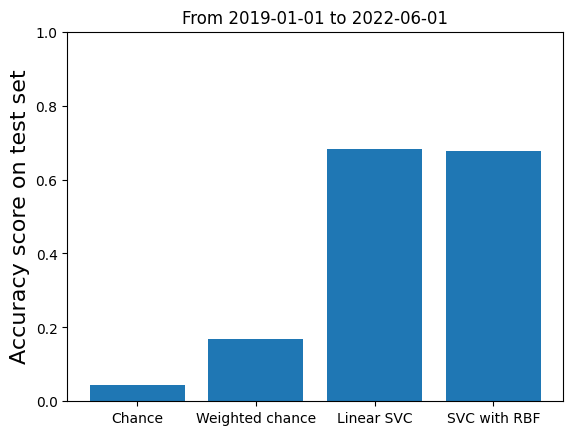

In [84]:
key, values = zip(*score.items())
plt.bar(key, values)
plt.ylabel('Accuracy score on test set', fontsize=16)
plt.ylim(0, 1)  
plt.title(['From ' + start_date + ' to ' + end_date])

plt.show()

# W2V and SVM model

In [97]:
import gensim

# let's load a pre-trained word2vec model from google- you may need to download this first
# https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g
pretrained_w2v_model_dir = '/home/marios/local_data_s2ds/GoogleNews-vectors-negative300.bin'
GoogleModel = gensim.models.KeyedVectors.load_word2vec_format(pretrained_w2v_model_dir, binary=True,)

NameError: name 'gensim' is not defined

In [98]:
#define corpus and do count vectorization 
corpus = [l for l in df['keywordStrings'].apply(lambda x: ', '.join(x))]
# Count vectorization of text
# Creating the vectorizer
vectorizer = CountVectorizer(stop_words='english')
# Converting the text to numeric data
X = vectorizer.fit_transform(corpus) 
# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
CountVectorizedData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
CountVectorizedData['Category']=df_dw['cleanFocusParentCategory'].values
print(CountVectorizedData.shape)
CountVectorizedData.head()
WordsVocab=CountVectorizedData.columns[:-1]
print(f'Number of words after count vectorization: {len(WordsVocab)}')

NameError: name 'df' is not defined

In [99]:
#this takes aboout an hour to run on my local machine, onnly rerun if you want to overwrite
W2Vec_Data=FunctionText2Vec(corpus)
output_dir = '/home/marios/local_data_s2ds/'
file_name = 'w2v_data_ALL_dirty.npy'
np.save(op.join(output_dir, file_name), W2Vec_Data)

NameError: name 'FunctionText2Vec' is not defined

In [100]:
#if you already have the embeddings you can load directly
word_embedding_dir = '/home/marios/local_data_s2ds/w2v_data_ALL_dirty.npy'
W2Vec_Data = pd.DataFrame(np.load(word_embedding_dir))

FileNotFoundError: [Errno 2] No such file or directory: '/home/marios/local_data_s2ds/w2v_data_ALL_dirty.npy'

In [101]:
# Adding the target variable
W2Vec_Data.reset_index(inplace=True, drop=True)
W2Vec_Data['Category']=CountVectorizedData['Category']
DataForML=W2Vec_Data.copy()

# making the string categories into integers so we can do ML
primary_categories = np.unique(DataForML.Category).tolist()
primary_categories = sorted(primary_categories)
prim_cat_dict = {}
for i, cat in enumerate(primary_categories):
    prim_cat_dict[cat] = i+1
DataForML.Category = DataForML.Category.apply(lambda x: prim_cat_dict[x] if x in prim_cat_dict else x)
DataForML.Category  = DataForML.Category.astype(int)
np.unique(DataForML.Category)

NameError: name 'W2Vec_Data' is not defined

In [102]:
# Separate Target Variable and Predictor Variables
TargetVariable=DataForML.columns[-1]
Predictors=DataForML.columns[:-1]
X=DataForML[Predictors].values
y=DataForML[TargetVariable].values
PredictorScaler=MinMaxScaler()
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)
# try SVC- fit, evaluate and save -OR load model furtheer down if you have it
model = SVC(C=20, kernel='rbf')
model.fit(X_train, y_train)
preds = model.predict(X_test)
evaluate_metrics(y_test, preds)
output_dir = '/home/marios/local_data_s2ds/'
file_name = 'SVC_model_category_classification.npy'
np.save(op.join(output_dir, file_name), model)

NameError: name 'DataForML' is not defined

In [103]:
#load model directly if you have it
model = np.load('/home/marios/local_data_s2ds/SVC_model_category_classification.npy', allow_pickle=True).tolist()

FileNotFoundError: [Errno 2] No such file or directory: '/home/marios/local_data_s2ds/SVC_model_category_classification.npy'

In [104]:
# Count vectorization of text for google searches extracted
# Creating the vectorizer
corpus2 = df_google['topic_title'].tolist()
vectorizer = CountVectorizer(stop_words='english')
# Converting the text to numeric data
X = vectorizer.fit_transform(corpus2) 
# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
CountVectorizedData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

print(CountVectorizedData.shape)
CountVectorizedData.head()
WordsVocab=CountVectorizedData.columns
print(f'Number of words after count vectorization: {len(WordsVocab)}')
W2Vec_Data2=FunctionText2Vec(corpus2)

NameError: name 'df_google' is not defined

In [105]:
# samee preparation done for training data being done for test data.
Predictors=W2Vec_Data2.columns
X_google_test=W2Vec_Data2[Predictors].values
PredictorScaler=MinMaxScaler()
PredictorScalerFit=PredictorScaler.fit(X_google_test)
# Generating the standardized values of X
X_google_test=PredictorScalerFit.transform(X_google_test)

#now let's predict using model 
preds = model.predict(X_google_test)
df_google['predicted_category'] = preds
#let's convert predictions from integeres back to the original categories to interpret them 
prim_num_dict = {}
for (num, cat) in zip(prim_cat_dict.values(), prim_cat_dict.keys()):
    prim_num_dict[num] = cat
prim_num_dict
df_google['predicted_category'] = df_google['predicted_category'].apply(lambda x: prim_num_dict[x] if x in prim_num_dict else x)
df_google['predicted_category']  = df_google['predicted_category'].astype(str)

NameError: name 'W2Vec_Data2' is not defined

In [106]:
#now let's find if each keyword was published on by DW- this takes 10-15 mins 
df_google['dw_published'] = np.zeros(df_google.shape[0])
for i in range(df_google.shape[0]):
    #slice original df based on dates
    print(i)
    start_date = df_google.date.iloc[i]
    end_date = df_google.date.iloc[i] + relativedelta(months=1)
    df_slice = truncate_data(df, start_date, end_date)
    kws_of_slice = [w for sublist in df_slice.keywordStrings for w in sublist]
    if str(df_google.topic_title[i]) in kws_of_slice:
        print(str(df_google.topic_title[i]))
        df_google.dw_published[i] = 1.0

NameError: name 'df_google' is not defined

In [107]:
#leet's group by eeach category, get the ratio of 1.0's and 0.0's and plot it 
cats = np.unique(df_google.predicted_category)
fig,ax = plt.subplots()
for cat in cats:
    print(cat)
    df_sub = df_google[df_google.predicted_category == cat]
    ratio = np.sum(df_sub.dw_published)/df_sub.shape[0]
    print(ratio)
    ax.bar(cat, ratio)
fig.autofmt_xdate(rotation=75)

ax.set_ylabel('Proportion of google trends covered \nby DW within a month after trending')
plt.show()

NameError: name 'df_google' is not defined

In [108]:
# functions
def truncate_data(df, start_date, end_date): 
    df['dt_lastModifiedDate'] = df.lastModifiedDate.apply(lambda x: d.datetime.strptime(x[:10], '%Y-%m-%d') if x is not None else x)
    df = df.sort_values(by = 'dt_lastModifiedDate')
    mask = np.logical_and(df['dt_lastModifiedDate']>=start_date, df['dt_lastModifiedDate']<end_date)
    df_subset = df[mask]
    return df_subset

# this function makes use thee pretrained google model to get word embeddings onn the vectorizeed input 
def FunctionText2Vec(inpTextData):
    # Converting the text to numeric data
    X = vectorizer.transform(inpTextData)
    CountVecData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
    # Creating empty dataframe to hold sentences
    W2Vec_Data=pd.DataFrame()
    # Looping through each row for the data
    for i in range(CountVecData.shape[0]):
        # initiating a sentence with all zeros
        Sentence = np.zeros(300)
        # Looping thru each word in the sentence and if its present in 
        # the Word2Vec model then storing its vector
        for word in WordsVocab[CountVecData.iloc[i , :]>=1]:
            #print(word)
            if word in GoogleModel.key_to_index.keys():    
                Sentence=Sentence+GoogleModel[word]
        # Appending the sentence to the dataframe
        W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
    return(W2Vec_Data)

def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='weighted')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos